In [1]:
ls

142629 - 1_11_iq-Copy1.jpg  __pycache__/  egg_detection.ipynb
143652 - 1.jpg              data/         fiveEpochs.h5
BinaryClassTraining.py      data2/        second_try.h5
README.md                   data3/        simple_detection.py
Untitled.ipynb              data4/        simple_obj_det.py


In [2]:
from keras.models import load_model
model = load_model('fiveEpochs.h5')

Using TensorFlow backend.


In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
I = cv2.imread('/root/eggtesting/data4/train/withEggs/145516 - 2_25_iq.jpg')
I1 = I/255.0
imgplot = plt.imshow(I1)
plt.title('Egg that is expected to detect as positive')
IArray = np.expand_dims(I1,axis=0)
model.predict(IArray)
#print(model.summary())
#model.loss



array([[7.02727e-23]], dtype=float32)

array([[0.99943656]], dtype=float32)

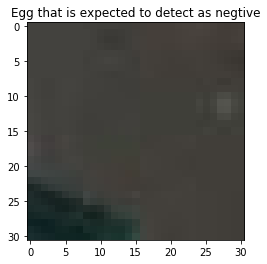

In [4]:
I2 = cv2.imread('/root/eggtesting/data4/train/withoutEggs/145516 - 2_25_iq.jpg')
I2 = I2/255.0
imgplot = plt.imshow(I2)
plt.title('Egg that is expected to detect as negtive')
IArray = np.expand_dims(I2,axis=0)
model.predict(IArray)

In [5]:
# Now try adding to a tensor and detecting on a tensor
INewArray = np.stack([I1,I2])
print(INewArray)
model.predict(INewArray)

[[[[0.18431373 0.2        0.17647059]
   [0.21960784 0.23529412 0.21176471]
   [0.25098039 0.25490196 0.23921569]
   ...
   [0.30980392 0.29803922 0.27843137]
   [0.28235294 0.29019608 0.26666667]
   [0.25490196 0.27058824 0.24705882]]

  [[0.20392157 0.21960784 0.19607843]
   [0.21568627 0.23137255 0.20784314]
   [0.22352941 0.22745098 0.21176471]
   ...
   [0.30196078 0.29019608 0.27058824]
   [0.27843137 0.27843137 0.25490196]
   [0.24705882 0.2627451  0.23921569]]

  [[0.23921569 0.26666667 0.23921569]
   [0.23529412 0.2627451  0.23529412]
   [0.22745098 0.24313725 0.22352941]
   ...
   [0.29411765 0.27843137 0.25882353]
   [0.27058824 0.27058824 0.24705882]
   [0.24705882 0.25490196 0.23137255]]

  ...

  [[0.15686275 0.21176471 0.20392157]
   [0.14509804 0.2        0.19215686]
   [0.14117647 0.19607843 0.18039216]
   ...
   [0.16078431 0.19607843 0.18431373]
   [0.15294118 0.18823529 0.17647059]
   [0.14901961 0.18431373 0.17254902]]

  [[0.16470588 0.23137255 0.21960784]
   [0.1

array([[7.0273231e-23],
       [9.9943656e-01]], dtype=float32)

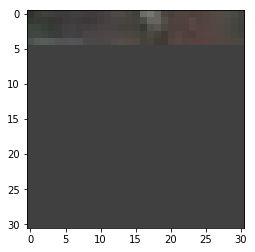

In [6]:
# try nieve approach
I3 = I1
I3[5:,:]=np.mean(I1)
plt.imshow(I3)

In [7]:
INewArray = np.stack([I1,I2,I3])

In [8]:
model.predict(INewArray)


array([[0.99982566],
       [0.99943656],
       [0.99982566]], dtype=float32)

In [9]:
model.predict_proba(INewArray)


array([[0.99982566],
       [0.99943656],
       [0.99982566]], dtype=float32)

[689 962   3]
[682. 961.   0.]


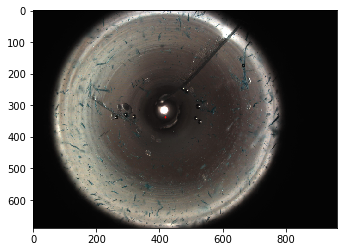

In [10]:
testImage = cv2.imread('143652 - 1.jpg')/255
testImage = cv2.resize(testImage,(0,0),fx = 0.25,fy = 0.25)
plt.imshow(testImage)
testImage = np.array(testImage)
testImageSize = np.array(testImage.shape)
print(testImageSize)

trainImageSize = 31
clippedTestImageSize = np.floor(testImageSize/trainImageSize)*trainImageSize
print(clippedTestImageSize)
idx = clippedTestImageSize.astype("int")
my = idx[0]
mx = idx[1]


(689, 962, 3)


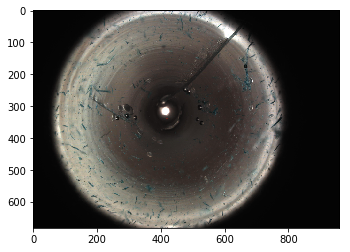

In [11]:
print(testImage.shape)
testImage2 = testImage[0:my,0:mx,:]
plt.imshow(testImage2)

In [12]:
for i in range(1,10):
    print(i)
    

1
2
3
4
5
6
7
8
9


(22, 31)
19.0


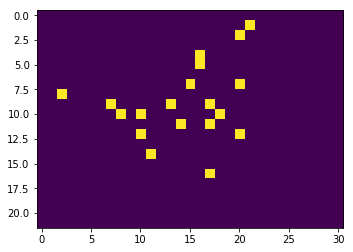

In [24]:


tileArrayDimensions = (clippedTestImageSize/trainImageSize).astype("int")
nTilesV = tileArrayDimensions[0]
nTilesH = tileArrayDimensions[1]

detectedRegions = np.zeros((nTilesV,nTilesH))
print(detectedRegions.shape)

# Try reshaping into one long tile
# longStrip = np.reshape(testImage2,[trainImageSize,nTilesH*nTilesV*trainImageSize,3])


for i in range(0,nTilesV):
    for j in range(0,nTilesH):
        yMin = i*trainImageSize
        yMax = (i+1)*trainImageSize
        xMin = j*trainImageSize
        xMax = (j+1)*trainImageSize
        testImageC = testImage2[yMin:yMax,xMin:xMax,:]
        #print(testImageC.shape)
        testImageD = np.expand_dims(testImageC,axis=0)
        #print(testImageD.shape)
        detectedRegions[i,j] = model.predict(testImageD)
    
    
    
#print(tileArrayDimensions)
#arrayLength = nTilesV*nTilesH
#imageTensor = np.zeros(tileArrayDimensions,tileArrayDimensions,3,nTilesV)
#listOfHStrips = np.split(testImage2,nTilesV,axis=0)
#listOfTiles = np.split(listOfHStrips,nTilesH,axis=1)
threshold = 0.1

detectedCellArray = (detectedRegions<threshold)/1.0
plt.imshow(detectedCellArray)
print(np.sum(detectedCellArray[:]))


        





In [14]:
plt.imshow(testTensor[15*15,:,:,:])
resultsVector = model.predict(testTensor)
resultsArray = np.reshape(resultsVector,[mSize[0],mSize[1]])
#plt.imshow(resultsArray)
#print(resultsVector)

NameError: name 'testTensor' is not defined

In [ ]:
M = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(M)
M[1,0]
np.reshape(M,[1,3,3])